In [4]:
import mmf_setup;mmf_setup.nbinit(hgroot=False)
from mmfutils.contexts import NoInterrupt
%pylab inline
import numpy as np

<IPython.core.display.Javascript object>

Populating the interactive namespace from numpy and matplotlib


c:\program files\python36\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft2', 'ifft2', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
def fft2(y):
    return np.fft.fftn(y, axes=(0,1))           
def ifft2(y):
    return np.fft.ifftn(y, axes=(0,1))
def f(x,y):
    return np.sin(x + y)

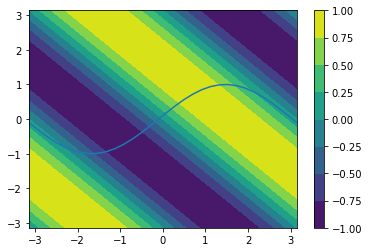

In [6]:
N = 32
L = 2*np.pi
dx = L/N
dy = dx
x = np.linspace(0,L,N) - L/2
y = np.linspace(0,L,N) - L/2
xx,yy = np.meshgrid(x,y)
z = np.sin(xx + yy) # sin(x^2 + y^2)
plt.contourf(x,y,z)
plt.plot(x,z[16])
plt.colorbar()
mat_shape = (N**2,)*2
Nxy = (N,N)
kxy = (2*np.pi * np.fft.fftfreq(N, dx)[:, None],2*np.pi * np.fft.fftfreq(N, dy)[None, :])
tensor_shape = (N,N,N,N)

In [7]:
nabla = np.eye(mat_shape[0]).reshape(tensor_shape)
K = np.eye(mat_shape[0]).reshape(tensor_shape)
D1 = ifft2(1j*sum(_k  for _k in kxy)[:, :,  None, None]*fft2(nabla)).reshape((np.prod(Nxy),)*2).reshape(mat_shape)
D2 = ifft2(sum(-_k**2 for _k in kxy)[:, :,  None, None]*fft2(K)).reshape((np.prod(Nxy),)*2).reshape(mat_shape)

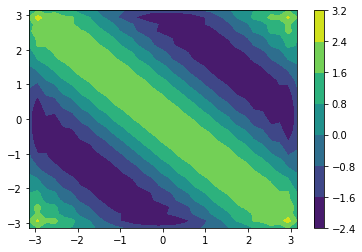

In [8]:
z1=D1.dot(z.ravel()).reshape(N,N)
plt.contourf(x,y,z1.real)
#plt.plot(x,z1[32])
plt.colorbar()

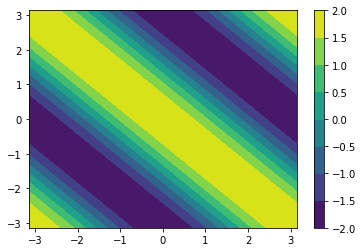

In [9]:
#z2 = (2*xx + 2 * yy) * np.cos(xx**2+yy**2)
z2 = 2*np.cos(xx+yy)#np.cos(xx)*np.cos(yy)-np.sin(xx)*np.sin(yy)# (2*yy+2*xx)* np.cos(xx**2+yy**2)
plt.contourf(x,y,z2)
#plt.plot(x,z2[32])
plt.colorbar()

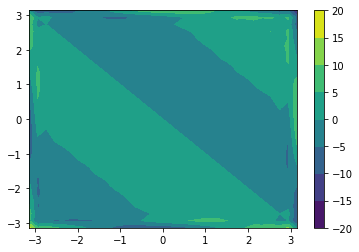

In [10]:
z3=D1.dot(z1.ravel()).reshape(N,N)#D2.dot(z.ravel()).reshape(N,N)
plt.contourf(x,y,z3.real)
#plt.plot(x,z1[32])
plt.colorbar()

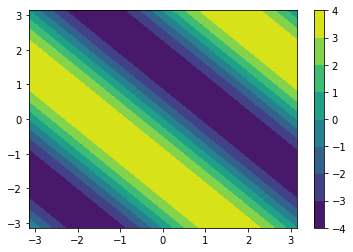

In [11]:
#z2 = (2*xx + 2 * yy) * np.cos(xx**2+yy**2)
z4 =-4*np.sin(xx+yy)#-2*(np.sin(xx)*np.cos(yy)+np.cos(xx)*np.sin(yy))#4*np.cos(xx**2 + yy**2) -4*(xx+yy)**2*np.sin(xx**2+yy**2)
plt.contourf(x,y,z4)
#plt.plot(x,z2[32])
plt.colorbar()